# Project Demonstration

## Host image

In [1]:
from iEnc import encrypt, decrypt, rgb_to_grey, get_loss
from skimage import io
import time
import warnings
warnings.filterwarnings('ignore')

Duplicate key in file '/Users/parijatparimal/.matplotlib/matplotlibrc' line #2.


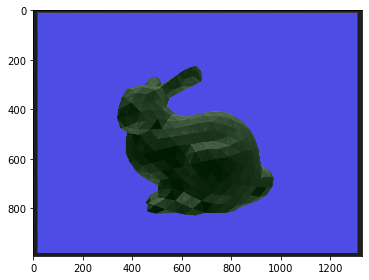

In [2]:
io.imshow('bunny.png')
io.show()

## Secret image

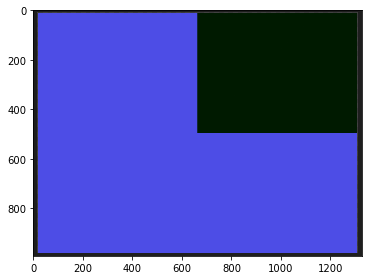

In [3]:
io.imshow('cube.png')
io.show()

## Watermarking secret image into the host image

Basic concept of watermarking an image inside another image is to insert the RGB values of each pixel in secret image into pixels of host image, such that the pixel values of host images are not disturbed much. The idea is to use the least significant bits of the pixel to store the pixel of secret image and when we want the secret image back, the values in least significant bits can be extracted and appropriately rescaled to get the secret image. It is also important to note that image formats use uint-8 format, hence each pixel has at most 8 bits. The least significant bits could then be the last two bits for example.
<br><br>
An interesting observation here is that there is an inherent tradeoff of losses involved in this watermarking process. For example, if out of the 8 bits, if only 1 bit is allotted for secret image, the information of 8 bits of secret image pixel needs to be represented in 1 bit would lead to loss if actual pixel value in secret image. On the other hand, if 4 bits out of the 8 bits of host image pixels are used to store pixel values of secret image, the watermarked image will not be able to hide the secret image, as the secret image will have significant representation in the watermarked image. Also, some amount of loss is still expected for secret image even when compressing 8 bit into 4 bits.
<br><br>
We present algorithms incrementally, such that, each successor algorithm attempts to fix the problems in predecessor algorithms.

## Algorithm 1 - Simple addition into least significant bits

Lossy conversion from float64 to uint8. Range [0.030196078431372547, 1.1]. Convert image to uint8 prior to saving to suppress this warning.


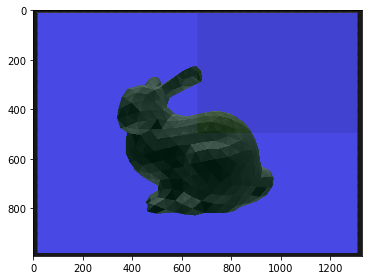

Time to watermark = 1.3171229362487793


In [4]:
import numpy as np
start = time.time()
img = io.imread('bunny.png')
bunny = np.array(img)/255
img = io.imread('cube.png')
cube = np.array(img)/255

significance_parameter = 10

watermarked_image = bunny + cube / significance_parameter
io.imsave('out.png', watermarked_image)
io.imshow('out.png')
io.show()
print("Time to watermark =",time.time() - start)

Lossy conversion from float64 to uint8. Range [-0.862745098039216, 0.5490196078431373]. Convert image to uint8 prior to saving to suppress this warning.


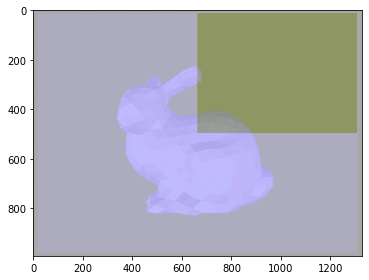

Time to extract secret image = 1.135807991027832


In [5]:
start = time.time()
img = io.imread('out.png')
wt_image = np.array(img)/255
secret_image = (wt_image - bunny) * significance_parameter
io.imsave('out1.png', secret_image)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

We can see if we allow secret image to have significant bits, the secret image becomes faintly visible in the watermarked image. If the significance parameter is increased, the host image will be the only significantly visible entity in the watermarked image, but then we will see more loss in the extracted secret image.

In [6]:
loss = get_loss('cube.png', 'out1.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.07647152838843069
PNSR accuracy = 59.2958059062107


### Attack

Apart from loss, the problem here is that the algorithm is too simple, and an attacker could just subtract the host image from watermarked image to get the secret image.

Lossy conversion from float64 to uint8. Range [-0.0862745098039216, 0.054901960784313725]. Convert image to uint8 prior to saving to suppress this warning.


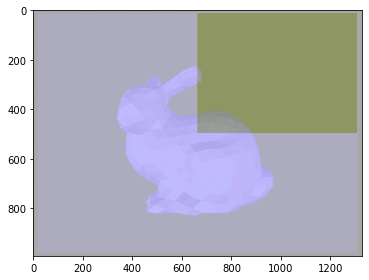

Time to extract secret image = 1.09781813621521


In [7]:
start = time.time()
img = io.imread('out.png')
wt_image = np.array(img)/255
secret_image = (wt_image - bunny)
io.imsave('out1.png', secret_image)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

Although, there is some difference in the original secret image and the one retrieved by the attacker (the shade of blue color), the attacker is able to retrieve almost the same image as some genuine user.

## Algorithm 2 -  DCT-DWT (Optional)

DCT and DWT are different mathematical tools that help us compress 8 bits into lesser number of bits with less loss. This algorithm works better with grayscale images as shown below. We had better expectations with this algorithm, but there seems to be lots of ditortions in the images obtained with this algorithm. It was also notices, that host image is also not required to retrieve the secret image. If the attacker knows that this algorithm was used, that would be enough to recover the image. Honestly, this algorithm did not improve anything, hence we mostly skipped this algorithm during presentation.

### Grayscale host image

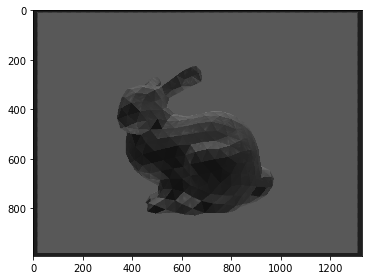

In [8]:
io.imshow(rgb_to_grey(io.imread('bunny.png')))
io.show()

### Grayscale secret image

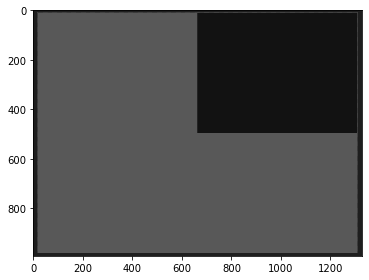

In [9]:
io.imshow(rgb_to_grey(io.imread('cube.png')))
io.show()

### Watermarked image

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


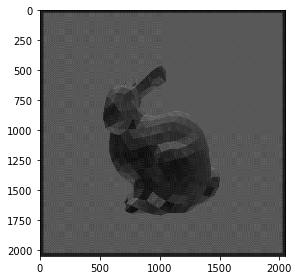

Time to watermark = 2.7443649768829346


In [10]:
start = time.time()
encrypt('bunny.png','cube.png','dctdwt','out2.png')
io.imshow('out2.png')
io.show()
print("Time to watermark =",time.time() - start)

### Extracted secret image

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


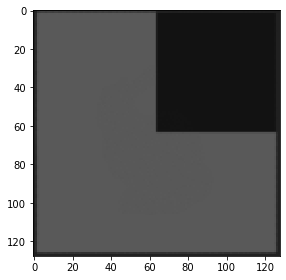

Time to extract secret image = 0.799793004989624


In [11]:
start = time.time()
decrypt('bunny.png','out2.png','dctdwt','out3.png')
io.imshow('out3.png')
io.show()
print("Time to extract secret image =",time.time() - start)

It can be seen that there are many problems with this algorithm:
<br>
1. Watermarked image looks distorted
2. Output images are reshaped
3. If the algorithm known to attacker, easy to extract the secret image

<br>
Because of these issues, this algorithm was found to be ineffective and hence we did not consider it further for our use cases.

## Algorithm 3 - Discrete Cosine Transformation (DCT)

### Watermarked image

Lossy conversion from float64 to uint8. Range [0.0027157148300435974, 1.00134097345426]. Convert image to uint8 prior to saving to suppress this warning.


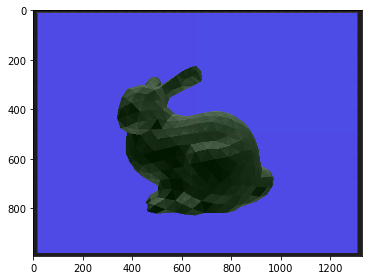

Time to watermark = 1.9139268398284912


In [12]:
start = time.time()
encrypt('bunny.png','cube.png','dct','out.png',ll=0)
io.imshow('out.png')
io.show()
print("Time to watermark =",time.time() - start)

### Extracted secret image

Lossy conversion from float64 to uint8. Range [-0.39215686274514105, 1.2369890313329328]. Convert image to uint8 prior to saving to suppress this warning.


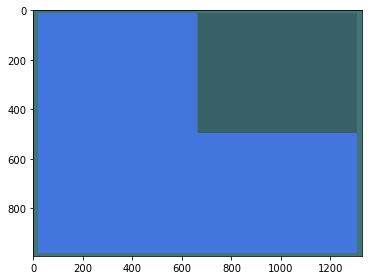

Time to extract secret image = 0.835949182510376


In [13]:
start = time.time()
decrypt('bunny.png','out.png','dct','out1.png',ll=0)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

In [14]:
loss = get_loss('cube.png', 'out1.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.02012772922273795
PNSR accuracy = 65.09285579603815


### Attack

Lossy conversion from float64 to uint8. Range [-0.011764705882352955, 0.007843137254901988]. Convert image to uint8 prior to saving to suppress this warning.


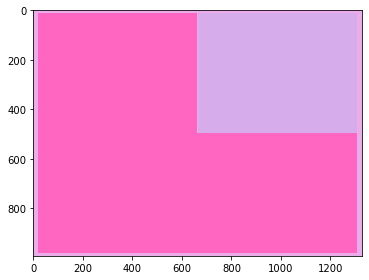

Time to attack = 0.575167179107666


In [15]:
start = time.time()
img = io.imread('out.png')
watermarked_image = np.array(img)/255
secret_image = (watermarked_image - bunny)
io.imsave('out2.png', secret_image)
img = io.imread('out2.png')
io.imshow(img)
io.show()
print("Time to attack =",time.time() - start)

## Algorithm 4 - Discrete Cosine Transformation (DCT) with shuffle

### Watermarked image

Lossy conversion from float64 to uint8. Range [0.0027157148300435974, 1.00134097345426]. Convert image to uint8 prior to saving to suppress this warning.


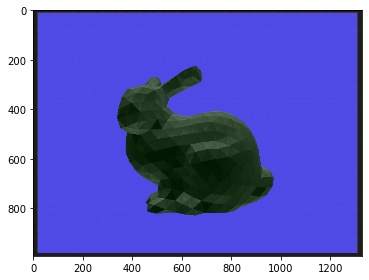

Time to watermark = 167.9368119239807


In [16]:
start = time.time()
encrypt('bunny.png','cube.png','dct','out.png',shuffle=1, r1=13241324, r2=24132413, ll=0)
io.imshow('out.png')
io.show()
print("Time to watermark =",time.time() - start)

### Extracted secret image

Lossy conversion from float64 to uint8. Range [-0.39215686274514105, 1.2369890313329357]. Convert image to uint8 prior to saving to suppress this warning.


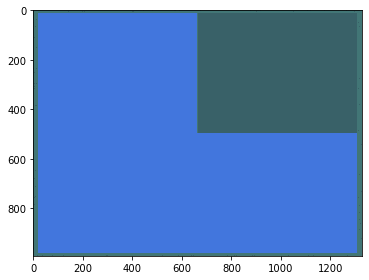

Time to extract secret image = 167.3227880001068


In [17]:
start = time.time()
decrypt('bunny.png','out.png','dct','out1.png',shuffle=1, r1=13241324, r2=24132413, ll=0)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

In [18]:
loss = get_loss('cube.png', 'out1.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.020112425061965127
PNSR accuracy = 65.0961592192046


### Attack

Lossy conversion from float64 to uint8. Range [-0.011764705882352955, 0.007843137254901988]. Convert image to uint8 prior to saving to suppress this warning.


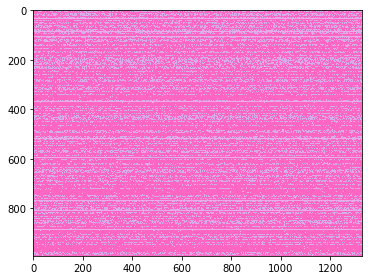

Time to attack = 5.592456102371216


In [19]:
start = time.time()
img = io.imread('out.png')
watermarked_image = np.array(img)/255
secret_image = (watermarked_image - bunny)
io.imsave('out2.png', secret_image)
img = io.imread('out2.png')
io.imshow(img)
io.show()
print("Time to attack =",time.time() - start)

# Algorithms 3 and 4 with lossless model

## Algorithm 3 - Discrete Cosine Transformation (DCT)

### Watermarked image

Lossy conversion from float64 to uint8. Range [0.0027157148300435974, 1.00134097345426]. Convert image to uint8 prior to saving to suppress this warning.


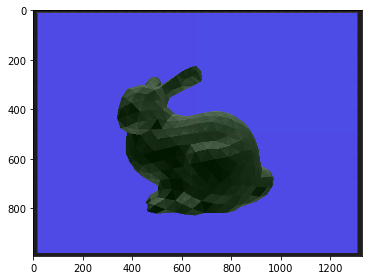

Time to watermark = 196.92024397850037


In [20]:
start = time.time()
encrypt('bunny.png','cube.png','dct','out.png',ll=1)
io.imshow('out.png')
io.show()
print("Time to watermark =",time.time() - start)

### Extracted secret image

Lossy conversion from float64 to uint8. Range [-5.980391737381296e-07, 1.000000829308073]. Convert image to uint8 prior to saving to suppress this warning.


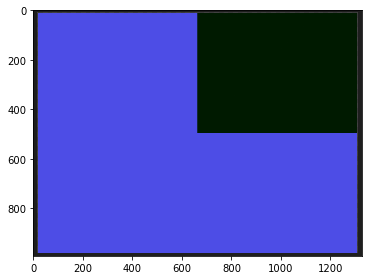

Time to extract secret image = 3.957980155944824


In [21]:
start = time.time()
decrypt('bunny.png','out.png','dct','out1.png',ll=1)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

In [22]:
loss = get_loss('cube.png', 'out1.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.0
PNSR accuracy = 100


### Attack

Lossy conversion from float64 to uint8. Range [-0.011764705882352955, 0.007843137254901988]. Convert image to uint8 prior to saving to suppress this warning.


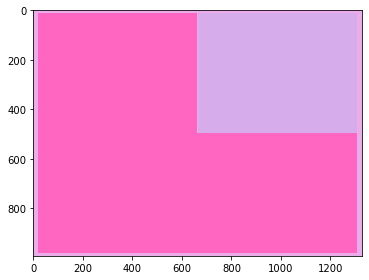

Time to attack = 0.7559123039245605


In [23]:
start = time.time()
img = io.imread('out.png')
watermarked_image = np.array(img)/255
secret_image = (watermarked_image - bunny)
io.imsave('out2.png', secret_image)
img = io.imread('out2.png')
io.imshow(img)
io.show()
print("Time to attack =",time.time() - start)

## Algorithm 4 - Discrete Cosine Transformation (DCT) with shuffle

### Watermarked image

Lossy conversion from float64 to uint8. Range [0.0027157148300435974, 1.00134097345426]. Convert image to uint8 prior to saving to suppress this warning.


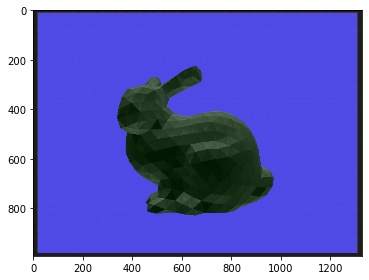

Time to watermark = 312.34366106987


In [24]:
start = time.time()
encrypt('bunny.png','cube.png','dct','out.png',shuffle=1, r1=13241324, r2=24132413, ll=1)
io.imshow('out.png')
io.show()
print("Time to watermark =",time.time() - start)

### Extracted secret image

Lossy conversion from float64 to uint8. Range [-6.07843131383845e-07, 1.000000829308073]. Convert image to uint8 prior to saving to suppress this warning.


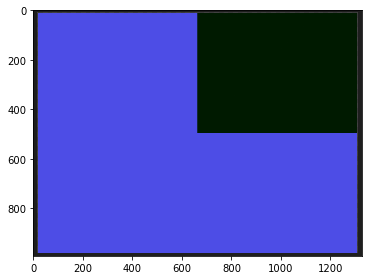

Time to extract secret image = 234.84732794761658


In [25]:
start = time.time()
decrypt('bunny.png','out.png','dct','out1.png',shuffle=1, r1=13241324, r2=24132413, ll=1)
io.imshow('out1.png')
io.show()
print("Time to extract secret image =",time.time() - start)

In [26]:
loss = get_loss('cube.png', 'out1.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.0
PNSR accuracy = 100


### Attack

Lossy conversion from float64 to uint8. Range [-0.011764705882352955, 0.007843137254901988]. Convert image to uint8 prior to saving to suppress this warning.


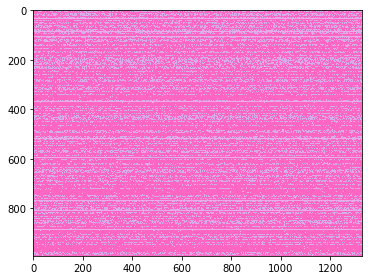

Time to attack = 6.441481828689575


In [27]:
start = time.time()
img = io.imread('out.png')
watermarked_image = np.array(img)/255
secret_image = (watermarked_image - bunny)
io.imsave('out2.png', secret_image)
img = io.imread('out2.png')
io.imshow(img)
io.show()
print("Time to attack =",time.time() - start)

In [28]:
loss = get_loss('cube.png', 'out2.png')
print("RMSE loss =", loss[0])
print("PNSR accuracy =", loss[1])

RMSE loss = 0.23406689123071997
PNSR accuracy = 54.43740373795399
